# Banking Dataset - Marketing Targets

### Deskripsi tiap kolom

age - umur client

job - tipe pekerjaan

marital - status pernikahan

education - jenjang pendidikan

default - memiliki kartu kredit?

balance - memiliki uang dalam akun bank?

housing - memiliki sewa/cicilan rumah?

loan - memiliki cicilan pribadi?

contact - jenis komunikasi kontak

month - bulan terakhir di kontak dalam kurun waktu tahun

day - hari terakhir di kontak dalam kurun waktu seminggu

duration - durasi kontak terakhir, dalam detik

campaign - jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini

pdays - jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya

previous - jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini

poutcomes - hasil dari kampanye pemasaran sebelumnya

Deposit - apakah klien sudah berlangganan deposito berjangka?

In [ ]:
# import library
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.style as style
import seaborn as sns
import math
import scipy.stats as st
import statsmodels.stats.proportion as sp

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from scipy import stats
from scipy.stats import kstest
from matplotlib import rcParams
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_auc_score

In [ ]:
df = pd.read_csv('bank-full.csv', delimiter = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# merubah nama kolom 'y' menjadi 'deposit' agar lebih mudah dimengerti
df.rename(columns={'y': 'deposit'}, inplace=True)

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Explore Data Analysis


## Descriptive Statistics

In [ ]:
# melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- Data terdiri dari 45211 baris dan 17 kolom. Terdapat 10 categorical features (termasuk label) dan 7 numerical features.

In [ ]:
# melihat statistik deskriptif pada data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
# melihat jumlah missing value
df.isna().sum()/len(df)*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

In [ ]:
# melihat data duplikat
df.duplicated().sum()

0

- Semua tipe data dan nama kolom sudah sesuai dengan valuenya.
- Tidak terdapat nilai kosong atau missing value.
- Tidak terdapat duplicated row


In [ ]:
# pengelompokan kolom berdasarkan typedata (numerikal & kategorikal)
df.select_dtypes(exclude='object').columns
df.select_dtypes(include='object').columns
nums = df.select_dtypes(exclude='object').columns
cats = df.select_dtypes(include='object').columns

In [ ]:
# melihat statistik deskriptif untuk kolom numerikal
df[nums].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- Terdapat nilai mean dan median yang berbeda cukup signifikan diantaranya kolom `balance`, `duration`, dan `pdays` sehingga terdapat dugaan adanya outliers.
- Terdapat nilai min dan median yang cukup aneh untuk kolom `pdays`, dimana `min dan mediannya` bernilai `-1`. Setelah dilakukan pemeriksaan terhadap deskripsi kolom, untuk nasabah yang memiliki `pdays` bernilai `-1` merupakan nasabah yang belum pernah dihubungi oleh call center terkait telemarketing pada campaign sebelumnya.
- Terdapat nilai `min` yang cukup aneh untuk kolom `balance`, yaitu nilai min yang merupakan bilangan negatif. Berdasarkan deskripsi kolom, `balance` merupakan saldo rata-rata tahunan, secara logika hal ini cukup aneh apabila seorang nasabah memiliki saldo rata-rata tahunan yang bernilai negatif. Perlu dipastikan lagi apakah ini merupakan kesalahan pada input data, atau terdapat beberapa nasabah yang memanfaatkan fasilitas kredit.

In [ ]:
# melihat percentage jumlah data 'balance' yang memiliki nilai minus
len(df[df['balance']<0])/len(df)

0.08329831235761209

- Terdapat 0.08% data balance dengan value minus

In [ ]:
# melihat value yang sering muncul pada masing-masing kolom numerikal
df[nums].mode()

,age,balance,day,duration,campaign,pdays,previous
0,32,0,20,124,1,-1,0


Dari informasi di atas diperoleh bahwa:

1. Usia client yang paling banyak ditemukan adalah client dengan usia 32 tahun.
2. Balance yang paling banyak ditemukan adalah 0 euro.
3. Day atau tanggal paling banyak adalah 20.
4. Duration yang paling banyak dilakukan adalah 124 detik.
5. Jumlah campaign yang sering(muncul) dilakukan untuk client adalah sebanyak 1 kali.
6. Dari nilai pdays, yang paling banyak adalah -1 (client belum dihubungi sebelumnya).
7. Nilai previous yang menandakan jumlah kontak yang dilakukan sebelum kampanye dilakukan terbanyak adalah 0.

In [ ]:
# melihat statistik deskriptif untuk kolom kategorikal
df[cats].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


Dari informasi di atas diperoleh bahwa:

1. Terdapat 12 macam pekerjaan namun blue-collar merupakan pekerjaan terbanyak.
2. Client yang terbanyak memiliki status menikah.
3. Kebanyakan pendidikan client adalah secondary.
4. Default no merupakan data yang kebanyakan ditemukan pada client.
5. Kebanyakan dari client sudah mempunyai rumah.
6. Kebanyakan dari client tidak mempunyai pinjaman.
7. Client paling banyak dihubungi melalui cellular.
8. Data month yang paling banyak adalah may.
9. Poutcome yang paling banyak ditemukan adalah unknown.
10. Nilai dari y yang paling sering muncul adalah no yang menandakan bahwa client kebanyakan tidak menjadi nasabah deposito.

## Univariate Analysis

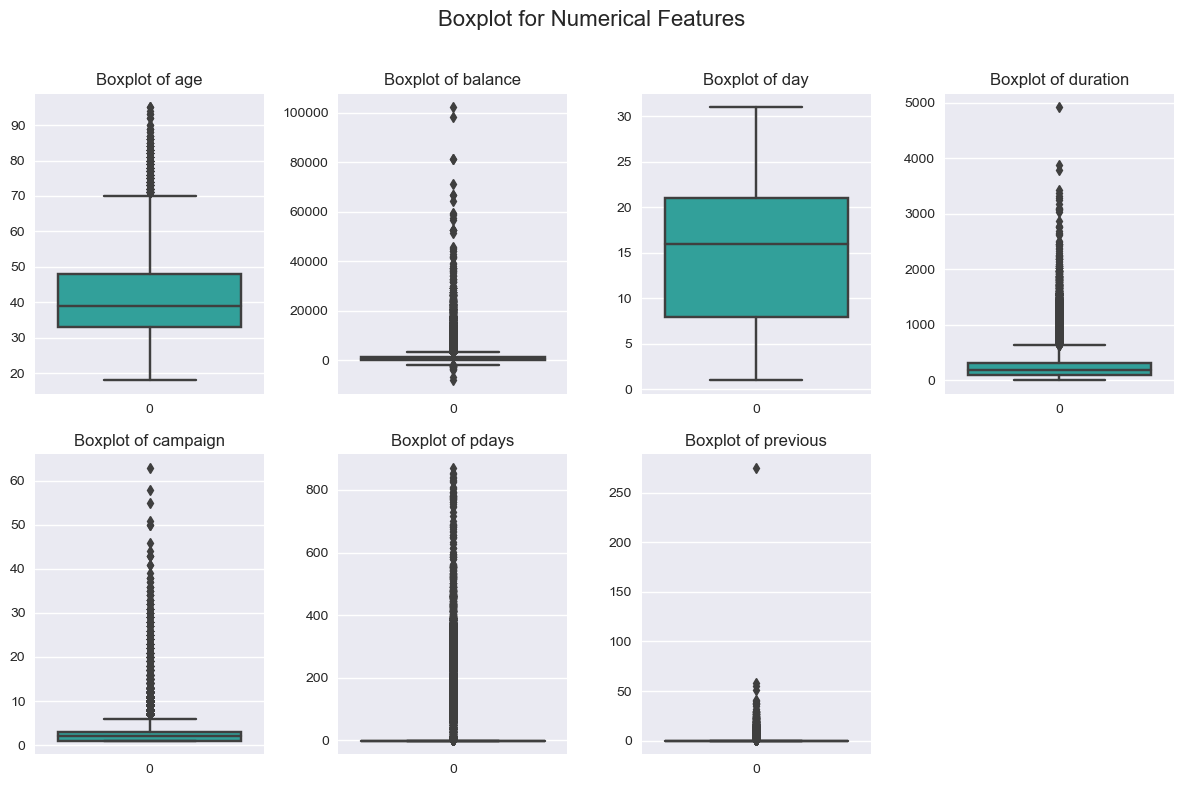

In [ ]:
# membuat boxplot untuk setiap kolom numerikal
plt.figure(figsize=(12, 8))
for i in range(0, len(nums)):
    plt.subplot(2,4, i+1)
    sns.boxplot(df[nums[i]], color='lightseagreen')
    plt.title('Boxplot of {}'.format(nums[i]))
    plt.suptitle('Boxplot for Numerical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout()
plt.show()

In [ ]:
# skewness value untuk kolom numerikal
for i in range(0, len(nums)):
    print(f"Skewness {df[nums].columns[i]} : {df[nums[i]].skew()}")

Skewness age : 0.6848179257252598
Skewness balance : 8.360308326166326
Skewness day : 0.09307901402122411
Skewness duration : 3.144318099423456
Skewness campaign : 4.898650166179674
Skewness pdays : 2.6157154736563477
Skewness previous : 41.84645447266292


Dari hasil visualisasi distribution dengan boxplot di atas, dapat diketahui bahwa:
- Hampir seluruh kolom numerikal memiliki jenis distribusi `positively skewed` atau `right-skewed`, kecuali untuk distribusi untuk kolom `day` dimana kolom tersebut memiliki jenis distribusi `multimodal`.
- Terlihat bahwa kolom `balance`, `duration`, `campaign`, `pdays` dan `previous` memiliki persebaran data yang cukup luas.
- Terdapat banyak value yang berpotensi sebagai outliers pada seluruh kolom numerikal, kecuali kolom `day` yang terlihat tidak memiliki outliers.
- Terdapat beberapa value yang berpotensi menjadi outliers ekstrim pada kolom `balance`, `duration` dan `previous`.
- Pada kolom `balance`, `duration`, `campaign` didominasi oleh nilai yang kecil. Variasi data yang banyak pada nilai tinggi membuat oulier menjadi semakin banyak.
- Pada kolom `pdays` memiliki nilai -1 (belum dihubungi sebelumnya) yang mendominasi yaitu 36954 dari 45211 baris atau sekitar 81.7% data sehingga kotak menjadi berpusat pada nilai -1 sehingga nilai-nilai diatas -1 menjadi oulier yang cukup banyak sekitar 18.3%.
- Pada kolom previous memiliki nilai 0 yang mendominasi yang sesuai dengan nilai -1 pada kolom pdays karena nilai ini memiliki korelasi yang kuat. Sehingga selain dari nilai 0 akan menjadi outlier. Namun ada satu nilai yang benar-benar sangat jauh yaitu 275 (outlier ini dapat dihapus karena hanya satu saja dan jaraknya sangat jauh).

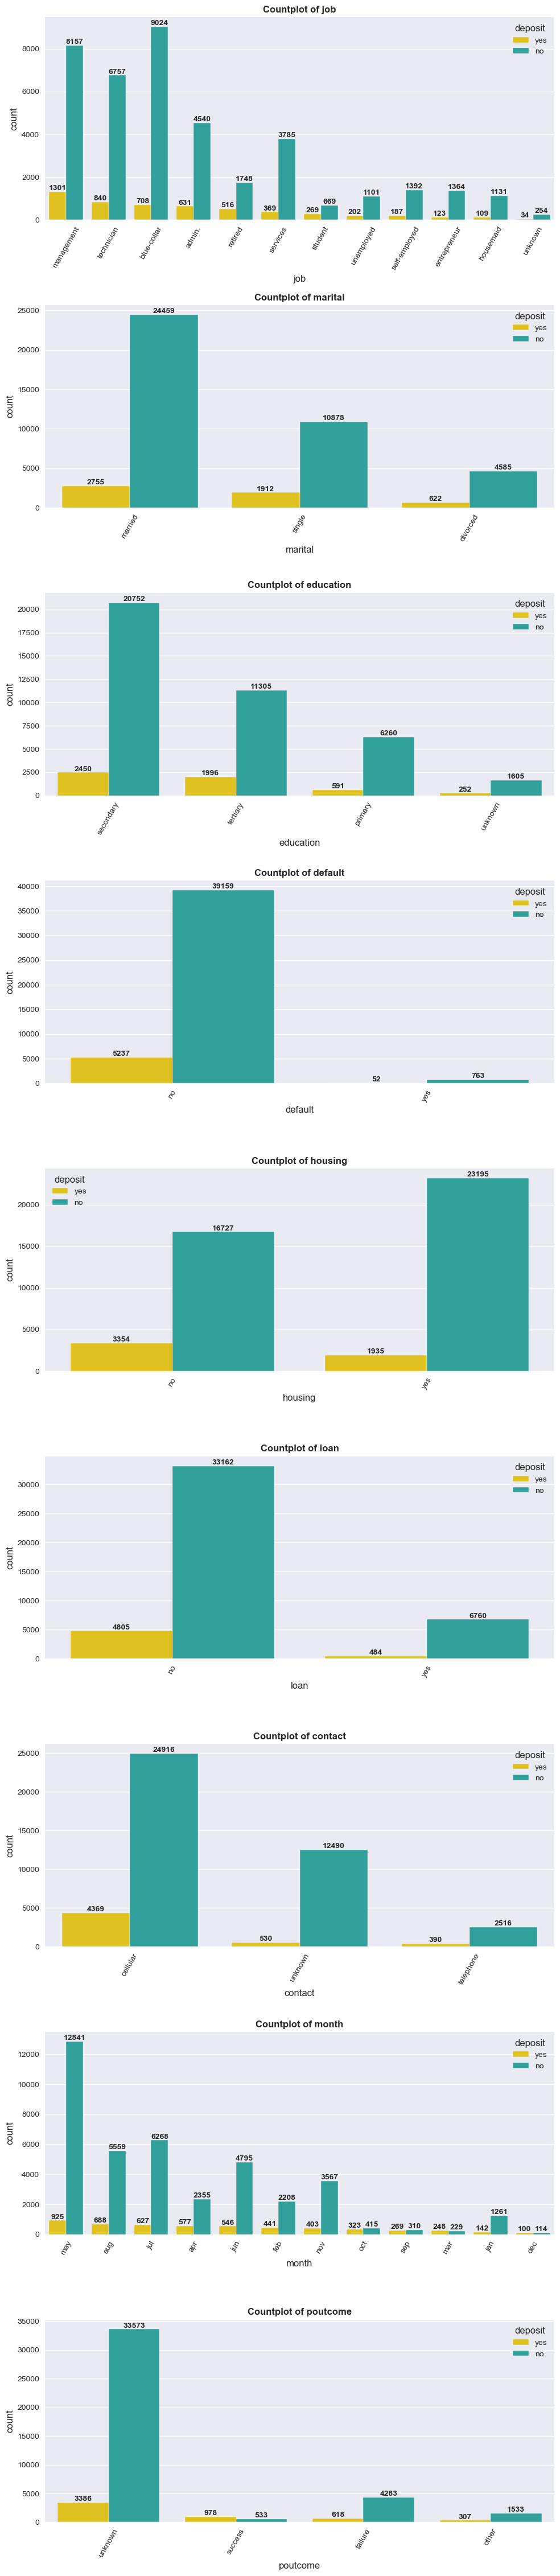

In [ ]:
# membuat countplot untuk setiap kolom kategori
plt.figure(figsize=(10, 45))
for i in range(0, len(cats)-1):
    df_group = df.groupby('deposit')[cats[i]].value_counts().reset_index(name='count').sort_values(by=['deposit','count'], ascending=False).set_index([cats[i]])
    plt.subplot(9,1, i+1)
    ab=sns.countplot(x=df[cats[i]], order = df_group.index[:int(len(df_group)/2)], hue=df['deposit'], hue_order=['yes', 'no'], palette=['gold','lightseagreen'])
    plt.title('Countplot of {}'.format(cats[i]), fontsize=12, fontweight ='bold')
    #plt.suptitle('Countplot for Categorical Features\n', fontsize=10, fontweight='medium')
    plt.tight_layout()
    plt.xticks(rotation = 60)
    for label in ab.containers :
        ab.bar_label(label, fontweight ='bold',fontsize=10)
plt.show()

Selain itu dapat diketahui juga bahwa:
- Terdapat beberapa kategori **unkown** pada kolom `job`, `education`, `contact` dan `poutcome`. Dimana jumlah kategori **unkown** pada kolom `poutcome` cukup mendominasi.
- Kategori `no` pada kolom `default` cukup mendominasi. Dimana sebanyak 98% value adalah `no` yang menandakan bahwa hampir seluruh nasabah yang dihubungi adalah nasabah yang tidak memiliki kredit.

Dari hasil visualisasi distribusi dengan countplot di atas, dapat diketahui bahwa:
1. Nasabah yang terbanyak berprofesi sebagai `Blue-collar`.
2. Nasabah dengan status sudah menikah merupakan klien yang terbanyak.
3. pendidikan `secondary` merupakan yang paling banyak
4. default `no` lebih banyak dibandingkan `yes`.
5. Nasabah yang memiliki cicilan rumah lebih banyak daripada yang tidak memiliki rumah.
6. Nasabah dengan status tidak ada pinjaman lebih banyak dibandingkan yang memiliki pinjaman.
7. Nasabah lebih banyak dihubungi melalui `cellular` daripada telephone dan unknown.
8. bulan `may` merupakan bulan yang paling banyak dilakukan campaign.
9. hasil dari kampanye pemasaran sebelumnya yang paling banyak adalah `unknown`.

Dari hasil visualisasi Countplot untuk seluruh variable kategorikal terhadap output variable yaitu `y`, dapat diketahui bahwa:

**Grafik Job**  
Nasabah yang paling sering dihubungi adalah mereka yang bekerja dalam sektor `blue-collar`. Jenis pekerjaan `blue-collar` memiliki jumlah nasabah tanpa langganan yang paling tinggi, sementara pekerjaan di bidang `manajemen` memiliki jumlah nasabah yang berlangganan paling tinggi. Pekerjaan sebagai `pelajar` memiliki rasio tertinggi antara nasabah yang berlangganan dan yang tidak, sedangkan rasio terendah terjadi pada nasabah dengan pekerjaan `blue-collar`. Secara keseluruhan, jumlah nasabah yang tidak berlangganan selalu lebih besar daripada jumlah nasabah yang berlangganan.

**Grafik Marital**  
Jumlah nasabah yang berlangganan dan tidak berlangganan paling besar terdapat pada status perkawinan `married`, diikuti oleh status `single` dan `divorced`.

**Grafik Education**  

Pendidikan tingkat `secondary` memiliki jumlah nasabah yang berlangganan dan tidak berlangganan paling tinggi, sementara tingkat pendidikan `primary` memiliki jumlah yang lebih rendah.

**Grafik Default**  
Jumlah nasabah yang berlangganan dan tidak berlangganan paling tinggi terdapat pada kelompok nasabah yang belum memiliki riwayat kredit sebelumnya, dibandingkan dengan nasabah yang telah memiliki riwayat kredit sebelumnya.

**Grafik Housing**  
Lebih banyak nasabah yang tidak memiliki cicilan rumah yang berlangganan dibandingkan dengan nasabah yang memiliki cicilan rumah.

**Grafik Loan**  
Jumlah nasabah yang berlangganan lebih banyak terdapat di antara mereka yang tidak memiliki pinjaman pribadi, daripada nasabah yang memiliki pinjaman pribadi.

**Grafik Contact**  
Jumlah nasabah yang berlangganan paling banyak terdapat pada kelompok nasabah yang dihubungi melalui jenis komunikasi 'cellular', melebihi jumlah nasabah pada jenis komunikasi lainnya.

**Grafik Month**  
Nasabah yang berlangganan dan yang tidak berlangganan memiliki jumlah tertinggi pada bulan Mei dibandingkan bulan lainnya.

**Grafik Poutcome**  
Mereka yang telah meraih kesuksesan dari kampanye sebelumnya memiliki rasio pembukaan deposito yang paling tinggi.


In [ ]:
df['marital'].value_counts()
dfa = df.groupby(['marital', 'deposit'])['age'].count()

dfa_pr = dfa.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index(name='percentage')
df_viz = dfa_pr.merge(dfa.reset_index(), how = 'inner', on = ['marital', 'deposit'])
df_viz

,marital,deposit,percentage,age
0,divorced,no,88.054542,4585
1,divorced,yes,11.945458,622
2,married,no,89.876534,24459
3,married,yes,10.123466,2755
4,single,no,85.050821,10878
5,single,yes,14.949179,1912


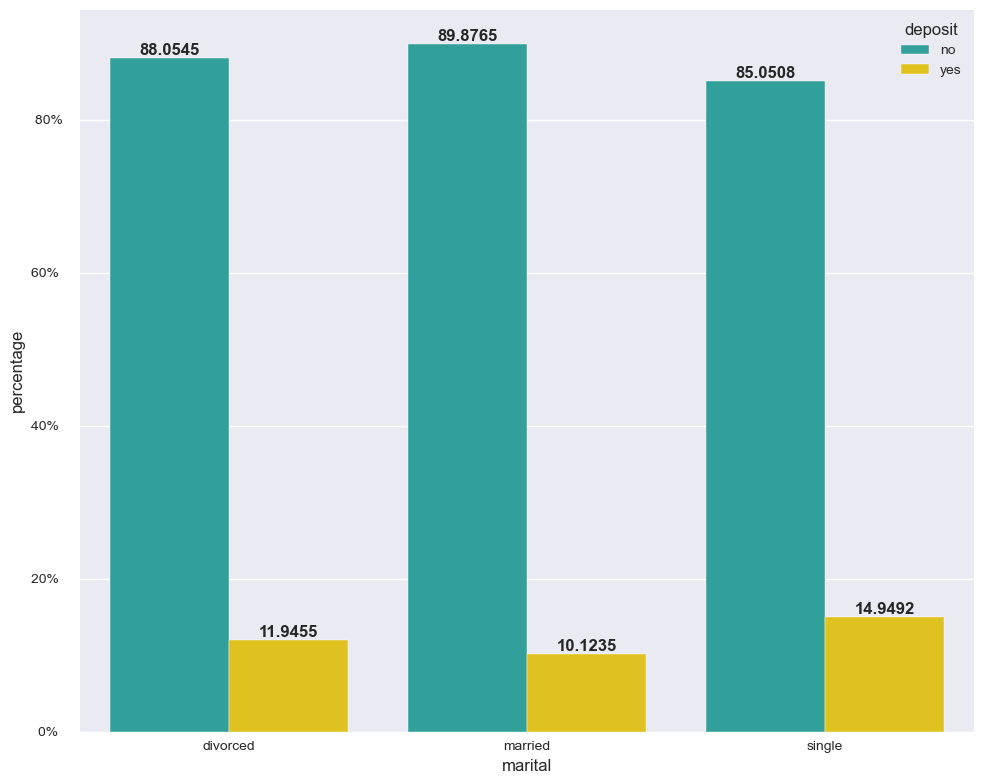

In [ ]:
import matplotlib.ticker as mticker
plt.figure(figsize=(10,8))
axt = sns.barplot(x='marital', y='percentage', hue='deposit', data=df_viz, palette=['lightseagreen','gold'])

for label in axt.containers :
    axt.bar_label(label, fontweight ='bold')
ticks_loc = axt.get_yticks()

axt.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
axt.set_yticklabels(labels =  ['0%   ', '20%   ', '40%   ', '60%   ', '80%  ', '100%'])

plt.tight_layout()

### Multivariate Analysis

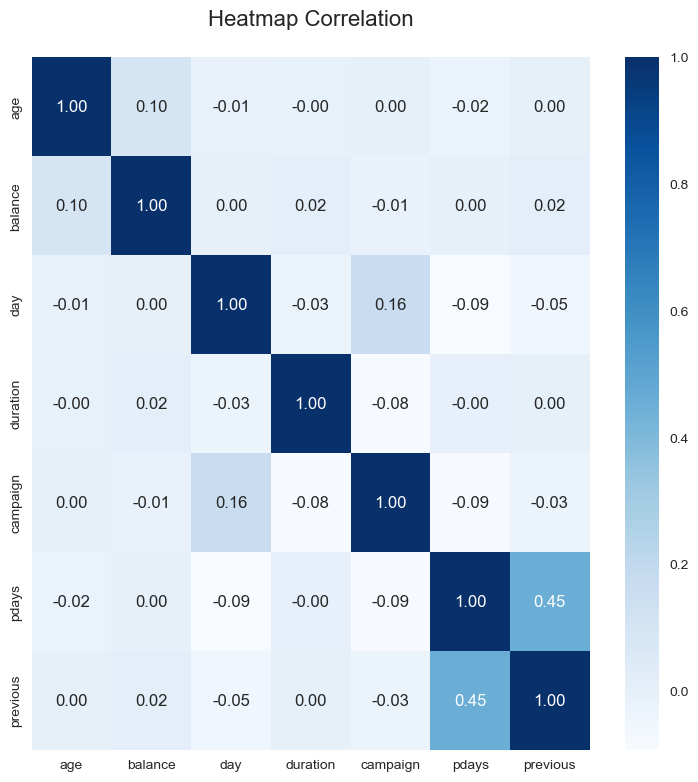

In [ ]:
# melihat korelasi antar kolom numerikal dengan heatmap
plt.figure(figsize=(9, 9))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Heatmap Correlation\n', fontsize=16)
plt.show()

- Dapat dilihat bahwa kebanyakan kolom-kolom numerikal tidak saling berkorelasi (angka pada heatmap kecil).
- Terdapat satu pasang kolom yang memiliki value cukup besar dibanding yang lainnya, yaitu korelasi antara kolom pdays dengan previous. Untuk mengetahui secara pasti apakah kolom pdays dengan previous berkorelasi, perlu dilakukan uji VIF.

In [ ]:
# melakukan uji VIF untuk melihat korelasi antar kolom pdays dengan previous
from statsmodels.stats.outliers_influence import variance_inflation_factor
def call_vif(df) :
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['variable'] = df.columns
    return(vif)

In [ ]:
call_vif(df[[i for i in df.describe().columns if i not in ['deposit']]])

,VIF,variable
0,5.004058,age
1,1.212908,balance
2,3.984268,day
3,1.901309,duration
4,1.824694,campaign
5,1.454202,pdays
6,1.341641,previous


- Pada pengujian VIF dapat dilihat nilai pada setiap kolom tidak ada yang >10

1.   Item daftar
2.   Item daftar

maka dapat dikatan **tidak ada kolom yang multikolinearitas**.

In [ ]:
from sklearn.feature_selection import f_classif, chi2, SelectKBest
# split dataset into features (X) and target (y)
X = df[['age','balance','day','duration','campaign','pdays','previous']]
y = df['deposit']

# perform ANOVA feature selection
f_scores, p_values = f_classif(X, y)

# create a dataframe to store feature names, f-scores, and p-values
anova_results = pd.DataFrame({'Features': X.columns, 'F-Scores': f_scores, 'P-Values': p_values})

# sort the dataframe by descending f-scores
anova_results = anova_results.sort_values(by='F-Scores', ascending=False, ignore_index=True)

# print the feature scores
anova_results

,Features,F-Scores,P-Values
0,duration,8333.761148,0.000000e+00
1,pdays,490.696563,3.790553e-108
2,previous,396.443989,7.801830e-88
3,campaign,243.358404,1.012347e-54
4,balance,126.572276,2.521114e-29
5,day,36.359010,1.653880e-09
6,age,28.625233,8.825644e-08


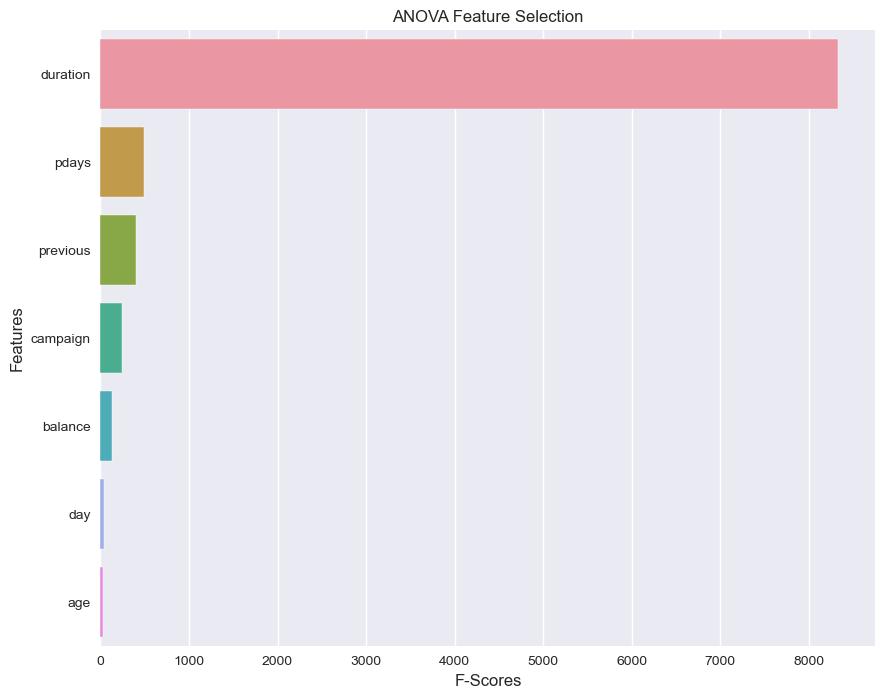

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='F-Scores', y='Features', data=anova_results, orient='h')
plt.title('ANOVA Feature Selection')
plt.xlabel('F-Scores')
plt.ylabel('Features')
plt.show()

In [ ]:
# split dataset into features (X) and target (y)
X = df[['job','marital','education','default','housing','loan','contact','month','poutcome']]
y = df['deposit']

# convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X, columns=X.columns)

# perform Chi2 feature selection
chi2_scores, p_values = chi2(X, y)

# create a dataframe to store feature names, chi2_scores, and p-values
chi2_results = pd.DataFrame({'Features': X.columns, 'chi2_scores': chi2_scores, 'P-Values': p_values})

# sort the dataframe by descending chi2_scores
chi2_results = chi2_results.sort_values(by='chi2_scores', ascending=False)

# print the feature scores
chi2_results = chi2_results.reset_index(drop=True)

# Only RevLineCr_Y, LowDoc_Y, RevLineCr_Y, LowDoc_N
# chi2_results = chi2_results.drop(chi2_results.index[32:])
# chi2_results = chi2_results.drop([0, 4, 14, 19, 22, 23, 28, 30]).reset_index(drop=True)
chi2_results

,Features,chi2_scores,P-Values
0,poutcome_success,4113.000571,0.000000e+00
1,month_mar,749.691937,4.681507e-165
2,month_oct,734.708162,8.480926e-162
3,contact_unknown,733.354934,1.669907e-161
4,month_sep,677.273004,2.617913e-149
5,housing_no,486.744003,7.282570e-108
6,housing_yes,388.949715,1.401285e-86
7,month_may,330.368818,7.988374e-74
8,contact_cellular,294.017126,6.626455e-66
9,job_retired,269.699331,1.319590e-60


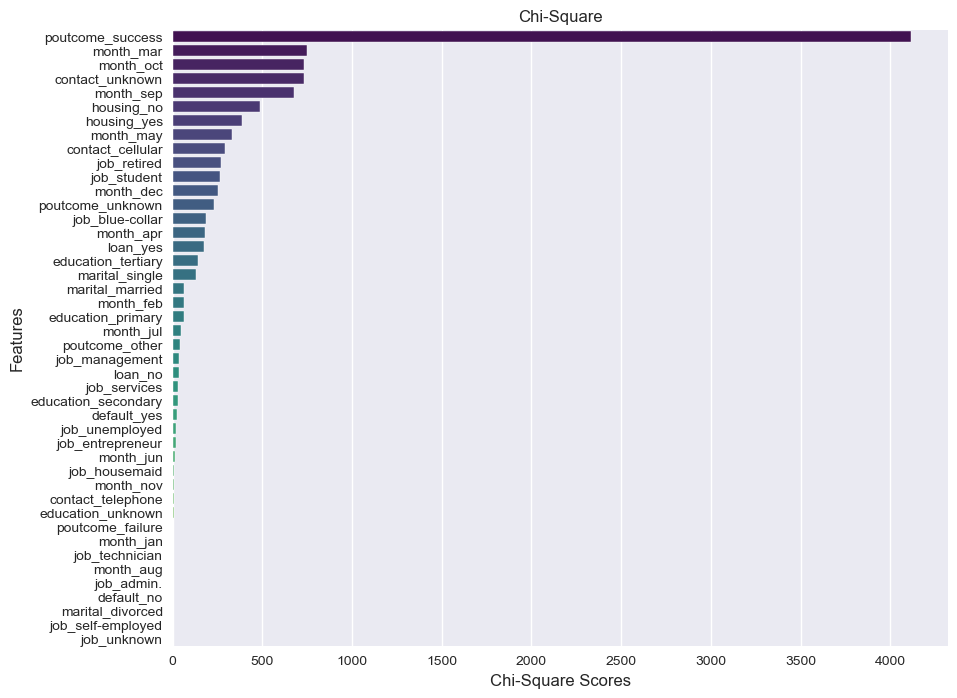

In [ ]:
# create horizontal bar plot for chi-square scores
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='chi2_scores', y='Features', data=chi2_results, palette='viridis')

# set title and labels
ax.set_title('Chi-Square')
ax.set_xlabel('Chi-Square Scores')
ax.set_ylabel('Features')

# show the plot
plt.show()

In [ ]:
# create a SelectKBest object
selector = SelectKBest(chi2, k=5)

# fit selector to data
selector.fit(X, y)

# get selected features
selected_features = X.columns[selector.get_support()]

# display selected features
print('Selected features:', list(selected_features))

Selected features: ['contact_unknown', 'month_mar', 'month_oct', 'month_sep', 'poutcome_success']


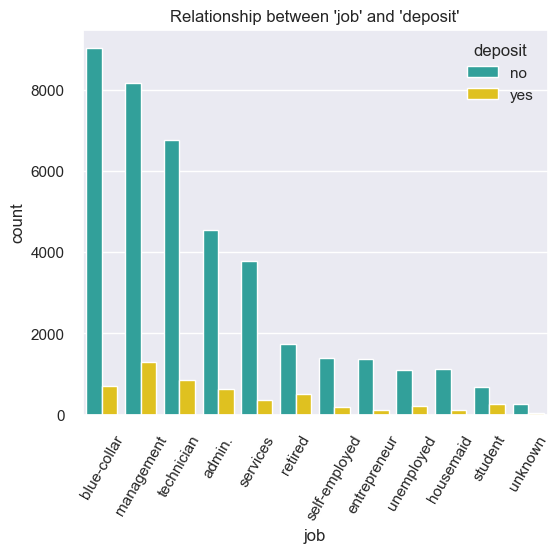

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
job = sns.countplot(x="job", data = df, hue = "deposit", palette=['lightseagreen','gold'], order = df["job"].value_counts().index)
job.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'job' and 'deposit'")
plt.show()

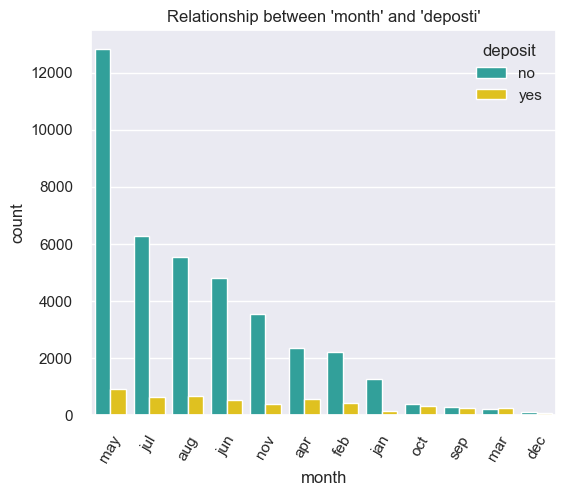

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
job = sns.countplot(x="month", data = df, hue = "deposit", palette=['lightseagreen','gold'], order = df["month"].value_counts().index)
job.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'month' and 'deposti'")
plt.show()

In [ ]:
df['duration'].min()

0

## Business Insight

### Ketimpangan jumlah nasabah yang belum dan sudah memilik deposit

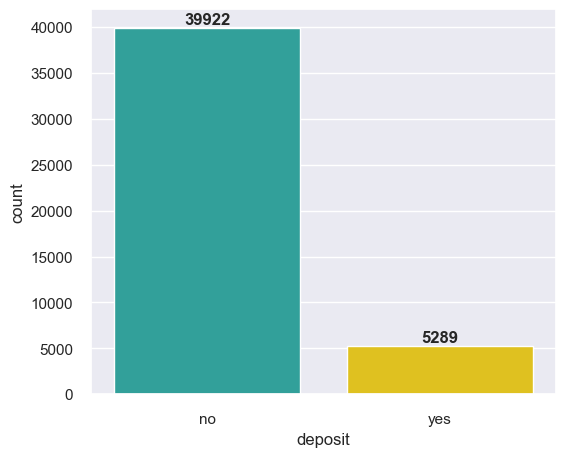

In [ ]:
bi1 = sns.countplot(x='deposit', data=df, palette=['lightseagreen','gold'])
for label in bi1.containers :
  bi1.bar_label(label, fontweight = 'bold')

- Terjadi ketimpangan antara orang yang melakukan deposit dan yang tidak, terlihat dari plot diatas jumlah yang melakukan deposit hanya 5289 customer sedangkan **yang belum melakukan deposit ada 39922 customer atau sebanyak 88%**. Hal ini tentu menjadi sebuah pekerjaan untuk tim marketing untuk mengkonversi customer yang belum deposit karena masih ada potensi yang besar.

### Nasabah didominasi oleh pekerja blue collar, management, dan technician di mana sebagian besar belum memiliki deposito

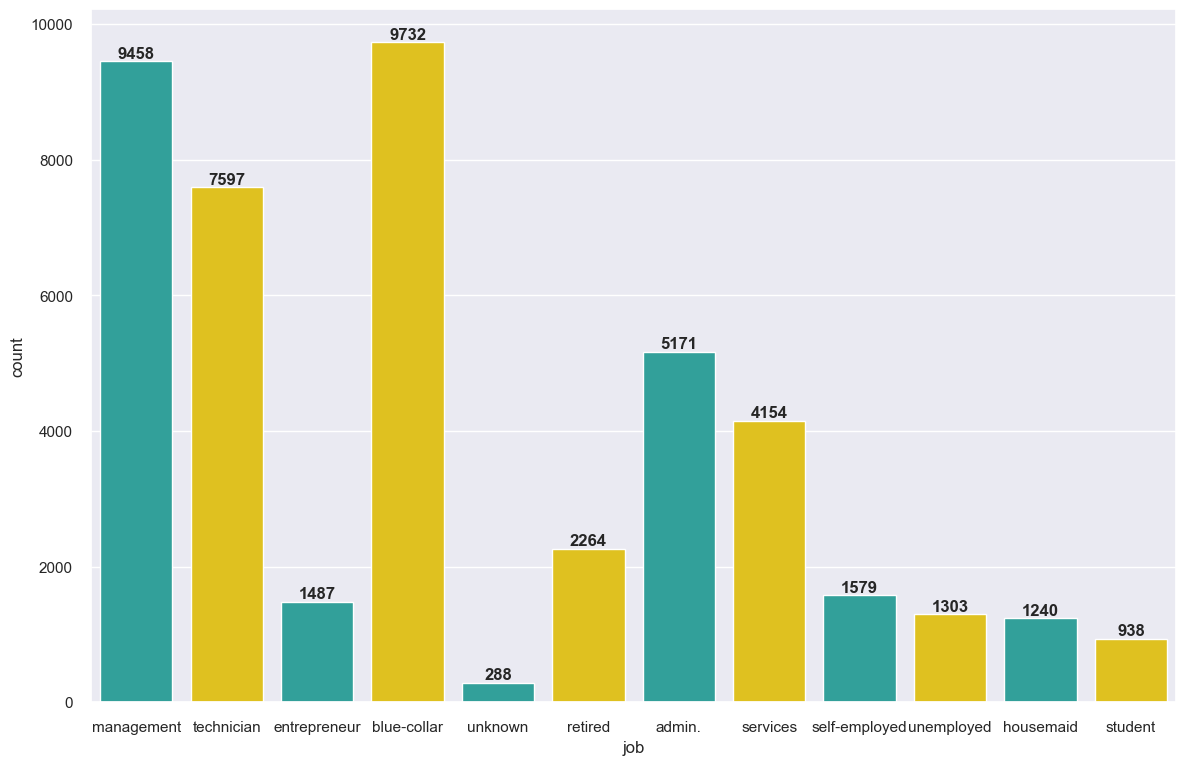

In [ ]:
plt.figure(figsize=(14,9))
bi2 = sns.countplot(x='job',data=df,palette=['lightseagreen','gold'])
for label in bi2.containers :
  bi2.bar_label(label, fontweight = 'bold')

- Seperti management, technician dan blue collar menjadi pekerjaan terbanyak dari customer bank.

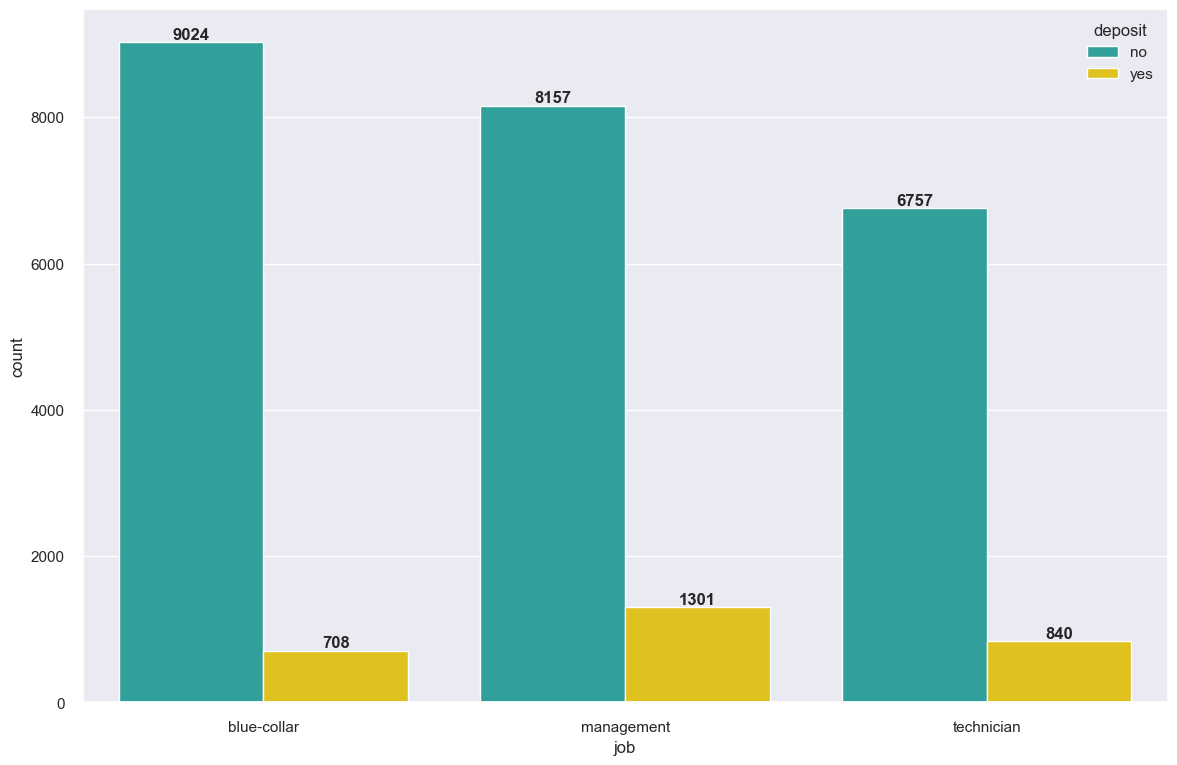

In [ ]:
plt.figure(figsize=(14,9))
bi3 = sns.countplot(x='job',hue='deposit',data=df, palette=['lightseagreen','gold'],
      order=df.job.value_counts().iloc[:3].index)
for label in bi3.containers :
   bi3.bar_label (label, fontweight='bold')

- Terjadi ketimpangan customer yang bekerja sebagai blue-collar, management dan technician di mana banyak dari mereka belum melakukan deposit.

### Nasabah tanpa cicilan rumah lebih memungkinkan untuk memiliki deposito dibandingkan dengan cicilan rumah

<Axes: xlabel='housing', ylabel='count'>

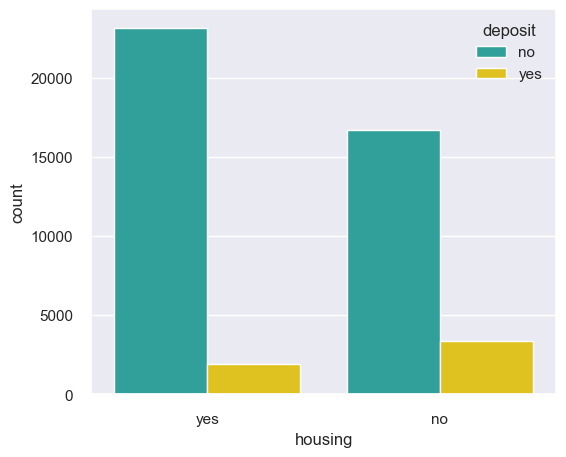

In [ ]:
sns.countplot(data=df, x ='housing', hue='deposit', palette=['lightseagreen','gold'])

- Insgiht: Pengguna yang punya cicilan rumah memiliki kemungkinan yang rendah untuk deposit di bank, sedangkan yang tidak memiliki cicilan rumah memiliki kemungkinan lebih besar untuk deposit di bank



- Rekomendasi: produk deposit ditawarkan kepada pengguna yang tidak memiliki cicilan rumah terlebih dahulu

### Pelajar memiliki rasio tertinggi dalam membuka rekening deposito, sedangkan blue collar memiliki rasio pembukaan deposito terendah

In [ ]:
def test(x):
    df_pro1 = df.groupby([x, 'deposit']).agg({'pdays':'count'}).reset_index().rename(columns={'pdays':'unique_customer'})
    df_pro2 = df.groupby([x]).agg({'pdays':'count'}).reset_index().rename(columns={'pdays':'total_customer'})

    df_pro = df_pro1.merge(df_pro2, how = 'inner', on=x)
    df_pro['percentage'] = round(df_pro['unique_customer'] / df_pro['total_customer'] * 100, 2)


    df_pro_pivot = df_pro.pivot_table(values=['unique_customer', 'percentage'], columns='deposit', index=x).reset_index()
    df_pro_pivot.columns = [x, 'no_perc', 'yes_perc', 'no_count', 'yes_count']
    df_pro_pivot = df_pro_pivot.fillna(0)
    df_pro_pivot['total_count'] = df_pro_pivot['no_count'] + df_pro_pivot['yes_count']
    return df_pro_pivot[[x, 'yes_count', 'no_count', 'yes_perc', 'no_perc', 'total_count']]

In [ ]:
def ratio_count(cat, percent_height=100, bar_color='lightseagreen', fig_row=1, fig_col=1, h_space=0.5):
    #Membuat visualisasi
    style.use('seaborn')

    fig, (ax1, ax2) = plt.subplots(fig_row, fig_col) #Inisiasi subplot 1 row 2 columns
    ## Inisiasi figure size
    fig.set_figheight(15)
    fig.set_figwidth(20)

    ##Mengurutkan data frame `df3_group_pivot` berdasarkan nilai churn secara descending.
    df_pro_pivot = test(cat)
    df_pro_pivot2 = df_pro_pivot.sort_values('yes_perc', ascending=False)

    ##Inisiasi variabel pendukung
    labels = list(df_pro_pivot2[cat])
    yes = df_pro_pivot2['yes_perc'].tolist()
    no = df_pro_pivot2['no_perc'].tolist()
    x = np.arange(len(labels)) # lokasi label
    width = 0.7 # lebar bar

    ##Membuat visualisasi barplot
    rects1 = ax1.bar(x, yes, width, label='Yes', color=bar_color)

    ## Menambahkan labels, title dan custom x-axis tick labels, dan sebagainya.
    ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
    ax1.set_facecolor('whitesmoke')
    ax1.set_ylabel('Ratio (%)',fontsize=13)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, fontsize=13)
    #ax1.bar_label(rects1, padding=10, fontsize=13, bbox = dict(facecolor = 'lightgray', alpha = .5))
    ax1.set_ylim([0, percent_height])
    ax1.set_xlabel(cat)
    # ax1.set_title('Rasio Pembukaan Akun Deposito berdasarkan Jenis Pekerjaan Nasabah')

    #Visualisasi Countplot
    df_pro_pivot3 = test(cat)
    df_pro_pivot4 = df_pro_pivot.sort_values('total_count', ascending=False)

    ##Inisiasi variabel pendukung
    labels2 = list(df_pro_pivot2[cat])
    yes2 = df_pro_pivot2['yes_count'].tolist()
    no2 = df_pro_pivot2['no_count'].tolist()
    x2 = np.arange(len(labels)) # lokasi label
    width2 = 0.4 # lebar bar

    ##Membuat visualisasi barplot
    rects3 = ax2.bar(x - width2/2, yes2, width2, label='Yes', color='gold')
    rects4 = ax2.bar(x + width2/2, no2, width2, label='No', color='lightseagreen')

    ax2.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
    ax2.set_facecolor('whitesmoke')
    ax2.set_ylabel('Count',fontsize=13)
    ax2.set_xticks(x)
    ax2.set_xticklabels(labels, fontsize=13)
    #ax2.bar_label(rects3, padding=10, fontsize=10, bbox = dict(facecolor = 'lightgray', alpha = .5))
    #ax2.bar_label(rects4, padding=10, fontsize=10, bbox = dict(facecolor = 'lightgray', alpha = .5))
    ax2.set_ylim([0, df[cat].value_counts().max()*1.01])
    plt.legend()
    plt.yticks(fontsize=10)

    plt.subplots_adjust(hspace=h_space)
    plt.xlabel(cat)

    for label in ax1.containers: ax1.bar_label (label, fontweight = 'bold')
    for label in ax2.containers: ax2.bar_label (label, fontweight = 'bold')
    return fig, (ax1, ax2)

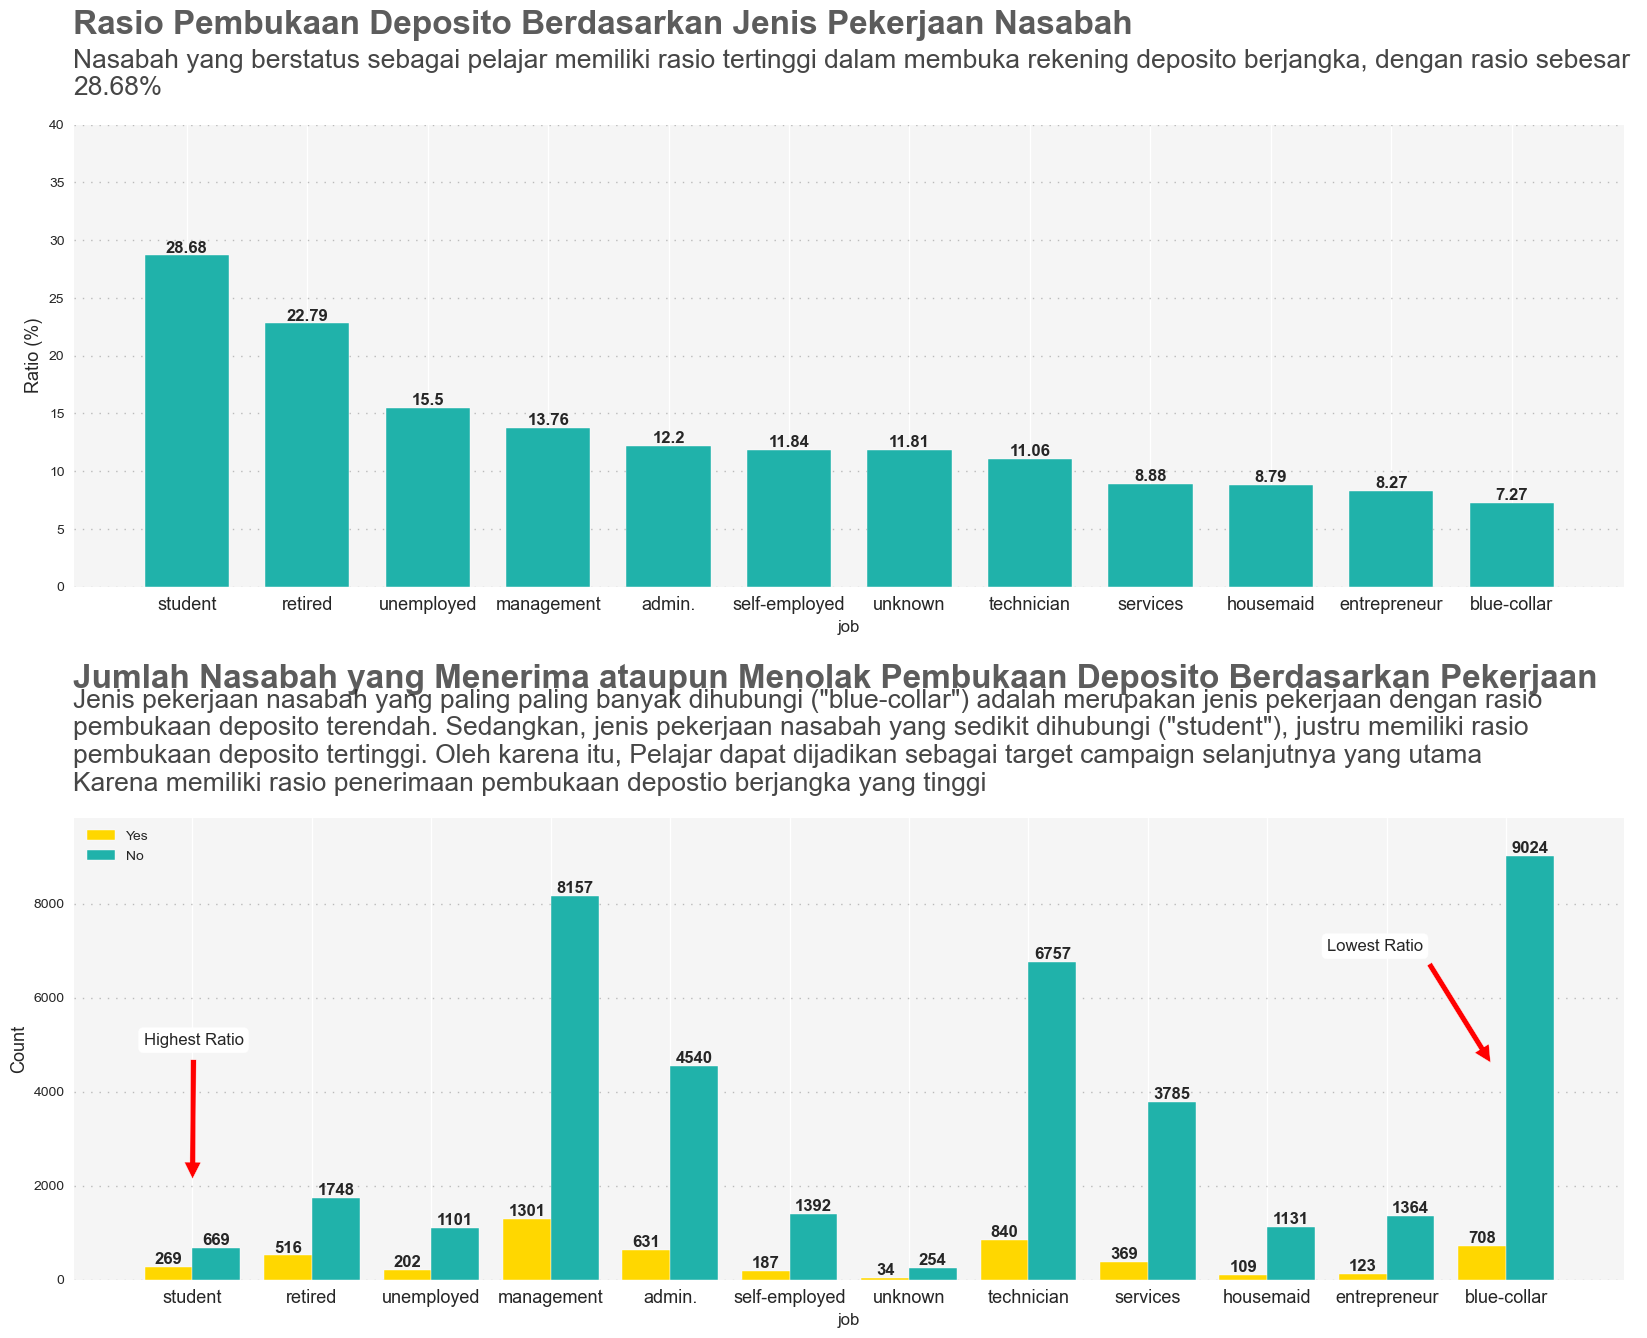

In [ ]:
ratio_count('job', percent_height=40, fig_row=2, fig_col=1)
plt.text(x = -1, y = 26500, s = "Rasio Pembukaan Deposito Berdasarkan Jenis Pekerjaan Nasabah",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -1, y = 25200,
               s = 'Nasabah yang berstatus sebagai pelajar memiliki rasio tertinggi dalam membuka rekening deposito berjangka, dengan rasio sebesar \n28.68%',
              fontsize = 19, alpha = .85)
plt.text(x = -1, y = 12600, s = "Jumlah Nasabah yang Menerima ataupun Menolak Pembukaan Deposito Berdasarkan Pekerjaan",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -1, y = 10400,
               s = 'Jenis pekerjaan nasabah yang paling paling banyak dihubungi ("blue-collar") adalah merupakan jenis pekerjaan dengan rasio \npembukaan deposito terendah. Sedangkan, jenis pekerjaan nasabah yang sedikit dihubungi ("student"), justru memiliki rasio \npembukaan deposito tertinggi. Oleh karena itu, Pelajar dapat dijadikan sebagai target campaign selanjutnya yang utama\nKarena memiliki rasio penerimaan pembukaan depostio berjangka yang tinggi',
              fontsize = 19, alpha = .85)

plt.annotate('Highest Ratio', xy =(0, 2000),
                xytext =(-0.41, 5000),
                arrowprops = dict(facecolor ='red', shrink=0.05),
                fontsize=12, bbox = dict(boxstyle ="round", fc ="1"))

plt.annotate('Lowest Ratio', xy =(10.9
                                  , 4500),
                xytext =(9.5, 7000),
                arrowprops = dict(facecolor ='red', shrink=0.05),
                fontsize=12, bbox = dict(boxstyle ="round", fc ="1"))

plt.show()

- Nasabah yang berstatus sebagai pelajar memiliki rasio tertinggi dalam membuka rekening deposito berjangka, dengan rasio sebesar 28.68%
- Jenis pekerjaan nasabah yang paling banyak dihubungi ialah blue-collar, merupakan jenis pekerjaan dengan rasio pembukaan deposito terendah. Sedangkan jenis pekerjaan nasabah yang sedikit dihubungi student, justru memiliki rasio pembukaan deposito tertinggi. Oleh karena itu, pelajar dapat dijadikan target campaign selanjutnya yang utama karena memiliki rasio penerimaan pembukaan deposito berjangka yang tinggi.

###  Married mendominasi data namun jumlah customer married yang sudah membuka deposit masih sedikit

(<Figure size 2000x1500 with 2 Axes>,
 (<Axes: xlabel='marital', ylabel='Ratio (%)'>,
  <Axes: xlabel='marital', ylabel='Count'>))

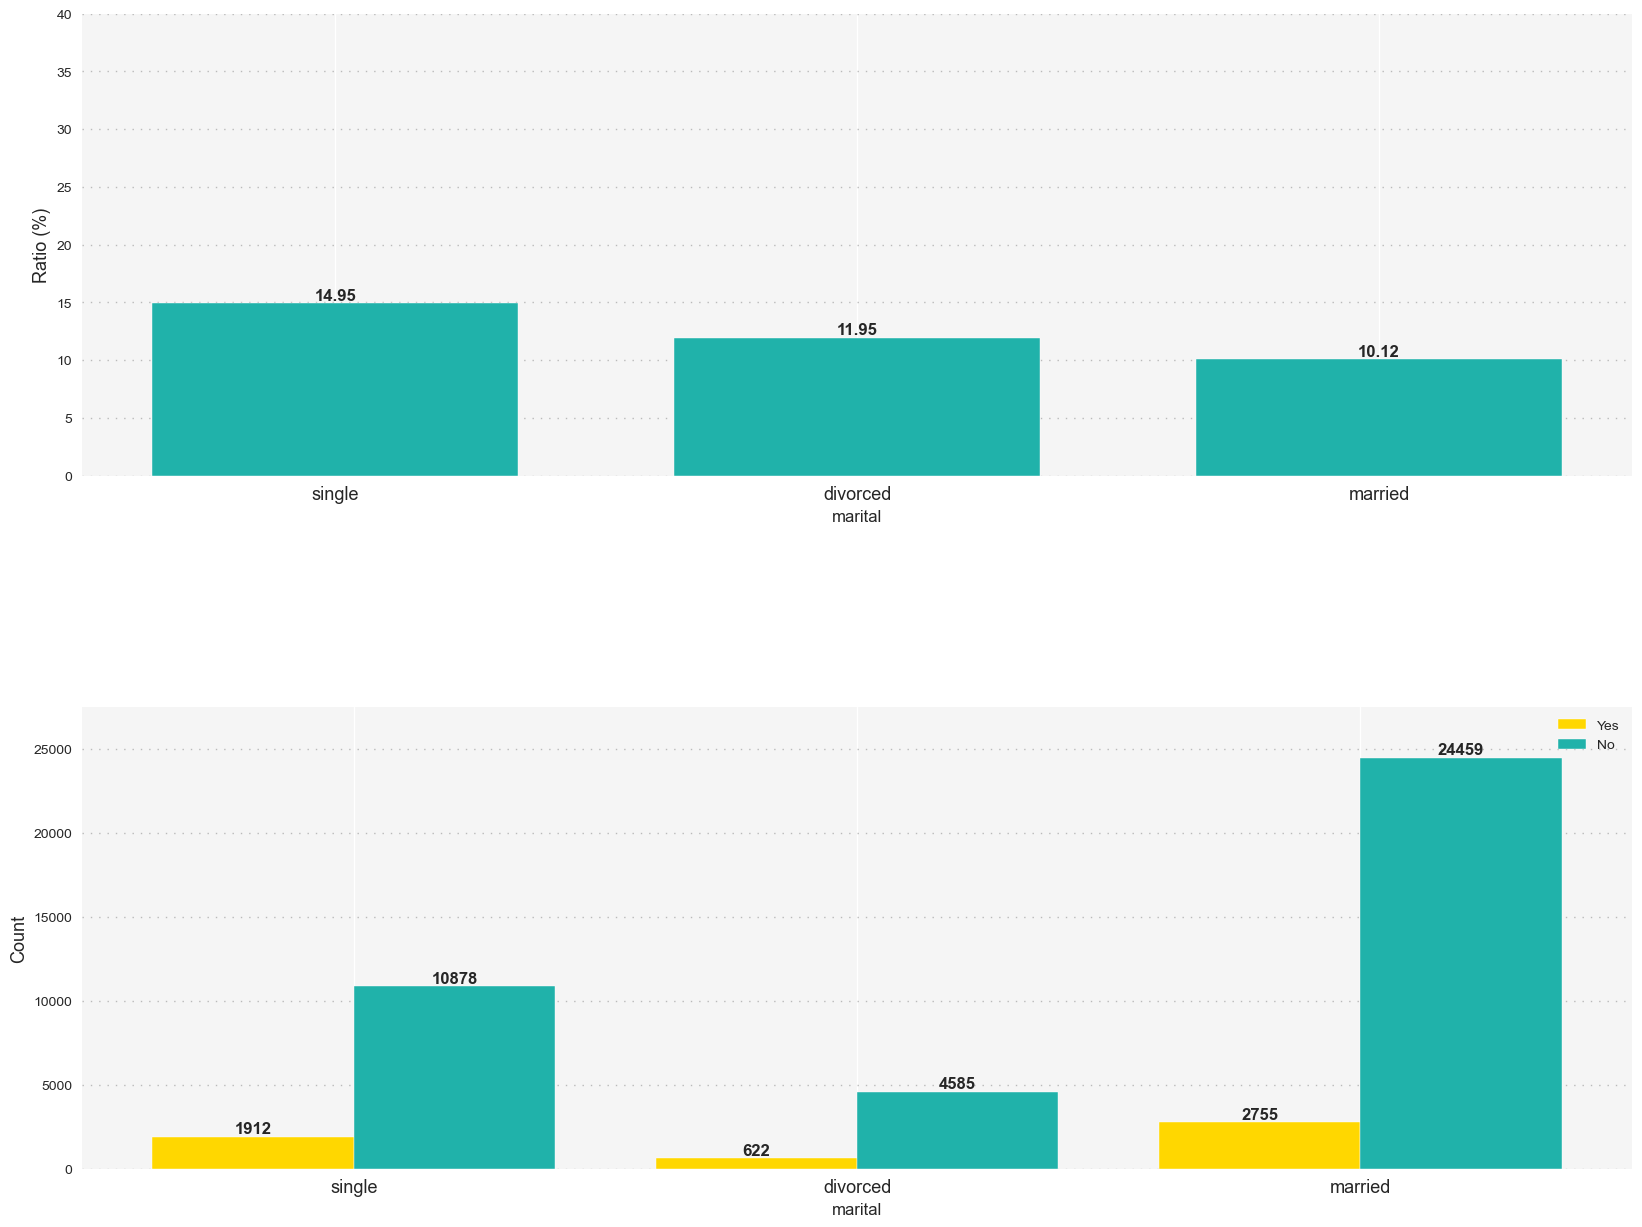

In [ ]:
ratio_count('marital', percent_height=40, fig_row=2, fig_col=1)

- Customer berstatus married mendominasi data dengan jumlah terbanyak dibandingkan dengan customer berstatus divorce atau single. Akan tetapi jumlah customer dengan status married yang sudah membuka deposit terbilang cukup sedikit yaitu hanya sebanyak 10% dari jumlah customer berstatus married.

### Business Recommendation

- Produk deposit ditawarkan kepada pengguna yang tidak memiliki cicilan rumah terlebih dahulu.
- Karena berdasarkan grafik yang membuka deposit adalah yang tidak mempunyai hutang, maka kami merekomendasikan agar bank memberikan penawaran deposit terhadap konsumen yang tida# Data Pre-processingk mempunyai hutang.

# Data Pre-processing

## Data Cleansing

### Handle Missing Value

In [ ]:
# melihat jumlah data missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- Missing value tidak perlu di-handle karena **tidak ada kolom yang memiliki nilai kosong**.

### Handle Duplicate Data

In [ ]:
# melihat jumlah data duplikat
df.duplicated().sum()

0

- Data duplikat tidak perlu di-handle karena **tidak ada data yang terduplikat**.

### Feature Transformation

In [ ]:
# mengubah data balance yang negatif menjadi 0
df.loc[df['balance'] < 0, 'balance'] = 0
df['balance'].min()

0

- Value kolom balance yang negatif di-handle dengan **diubah menjadi value 0**.

### Feature Encoding

In [ ]:
# melakukan perubahan pada kolum job, mengambil top 5 job dan sisanya yang dibawah itu akan menjadi others.
df['job'].value_counts()  # mengecek jumlah unique value dari tiap job

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

kami akan mengambil top 5 job karena 5 job tersebut memiliki kemungkinan pengaruh yang cukup besar mendominasi data. sehingga top 5 job nya adalah blue-collar, management, technician, admin., dan  services

In [ ]:
# mengambil top 5 pekerjaan dengan frekuensi minimal 4000 lalu sisanya menjadi "others"
frekuensi_minim = 4000
count_kategori = df['job'].value_counts()
values_keep = count_kategori[count_kategori >= frekuensi_minim].index.tolist()
df['job_filter'] = df['job'].apply(lambda x: x if x in values_keep else 'others')
df['job_filter'].value_counts()

blue-collar    9732
management     9458
others         9099
technician     7597
admin.         5171
services       4154
Name: job_filter, dtype: int64

In [ ]:
#Grouping Age
def age_group(x):
    if x > 45:
        grup = 'Senior_Adult'
    elif x > 30:
        grup = 'Adult'
    else:
        grup = 'Young_Adult'

    return grup

df['age_group'] = df["age"].apply(lambda x: age_group(x))

In [ ]:
df_copy=df.copy() #cekpoin

In [ ]:
# melakukan OHE pada kolom job
for cat in ['job']:
  onehots = pd.get_dummies(df_copy[cat], prefix=cat)
  df_ohe = df_copy.join(onehots)

In [ ]:
for cat in ['poutcome']:
  onehots = pd.get_dummies(df_ohe[cat], prefix=cat)
  df_ohe_done = df_ohe.join(onehots)

In [ ]:
df_ohe_done.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   job                45211 non-null  object
 2   marital            45211 non-null  object
 3   education          45211 non-null  object
 4   default            45211 non-null  object
 5   balance            45211 non-null  int64 
 6   housing            45211 non-null  object
 7   loan               45211 non-null  object
 8   contact            45211 non-null  object
 9   day                45211 non-null  int64 
 10  month              45211 non-null  object
 11  duration           45211 non-null  int64 
 12  campaign           45211 non-null  int64 
 13  pdays              45211 non-null  int64 
 14  previous           45211 non-null  int64 
 15  poutcome           45211 non-null  object
 16  deposit            45211 non-null  objec

In [ ]:
# merubah tipe data job filter hasil dari OHE dari boolean menjadi int
df_ohe_done.loc[:, df_ohe_done.dtypes.eq('uint8')] = df_ohe_done.loc[:, df_ohe_done.dtypes.eq('uint8')].astype(np.int64)
df_ohe_done.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   job                45211 non-null  object
 2   marital            45211 non-null  object
 3   education          45211 non-null  object
 4   default            45211 non-null  object
 5   balance            45211 non-null  int64 
 6   housing            45211 non-null  object
 7   loan               45211 non-null  object
 8   contact            45211 non-null  object
 9   day                45211 non-null  int64 
 10  month              45211 non-null  object
 11  duration           45211 non-null  int64 
 12  campaign           45211 non-null  int64 
 13  pdays              45211 non-null  int64 
 14  previous           45211 non-null  int64 
 15  poutcome           45211 non-null  object
 16  deposit            45211 non-null  objec

In [ ]:
# cek jumlah unknown pada kolom job
df_ohe_done['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
# cek jumlah unknown pada kolom job
df_ohe_done['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
df_ohe_done['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [ ]:
df_fe=df_ohe_done.copy()

## Feature Engineering

### Feature Selection

In [ ]:
columns_to_drop = ['day','duration','job_filter','job','pdays','previous','poutcome', 'age']
df_dropped = df_fe.drop(columns=columns_to_drop)

In [ ]:
df_dropped.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marital            45211 non-null  object
 1   education          45211 non-null  object
 2   default            45211 non-null  object
 3   balance            45211 non-null  int64 
 4   housing            45211 non-null  object
 5   loan               45211 non-null  object
 6   contact            45211 non-null  object
 7   month              45211 non-null  object
 8   campaign           45211 non-null  int64 
 9   deposit            45211 non-null  object
 10  age_group          45211 non-null  object
 11  job_admin.         45211 non-null  int64 
 12  job_blue-collar    45211 non-null  int64 
 13  job_entrepreneur   45211 non-null  int64 
 14  job_housemaid      45211 non-null  int64 
 15  job_management     45211 non-null  int64 
 16  job_retired        45211 non-null  int64

- Drop column ‘day’ dikarenakan column ini tidak terlalu relevan, dan lebih terwakilkan oleh column ‘month’.
- Drop column ‘duration’ dikarenakan ‘duration’ pada dataset hanya sebagai historis lama waktu telpon, sehingga tidak berpengaruh dengan campaign yang sekarang.


### Feature Extraction

- **Tidak ada feature baru yang ditambahkan**, dikarenakan feature yang sudah ada sudah cukup mewakilkan.


### Feature Tambahan

- Investment : informasi jenis investasi yang dimiliki oleh nasabah. (categorical: "stocks", "bonds", "property", "precious metal", "cryptocurrency", "others", "no";
note: "no" berarti belum memiliki investasi)
- Expenditure : informasi pengeluaran bulanan rata-rata. (numeric)
- Dependent : informasi jumlah tanggungan nasabah.
(numeric, 0 berarti tidak memiliki tanggungan)
- Risk tolerance : informasi seberapa besar toleransi risiko nasabah. (categorical: conservative, moderate, aggressive)


In [ ]:
# melakukan encoding pda kolom kategorical
# mengcopy df agar lebih aman jika sudah fix maka akan disatukan kedalam df asli
df_encode = df_dropped.copy()
df_encode['marital'] = df_encode['marital'].map({
    'single'    : 0,
    'married'   : 1,
    'divorced'  : 2
})

df_encode['education'] = df_encode['education'].map({
    'unknown'    : 0,
    'secondary'  : 1,
    'tertiary'   : 2,
    'primary'    : 3
})

df_encode['default'] = df_encode['default'].map({
    'no'    : 0,
    'yes'  : 1
})

df_encode['contact'] = df_encode['contact'].map({
    'unknown'    : 0,
    'cellular'   : 1,
    'telephone'  : 2
})

df_encode['housing'] = df_encode['housing'].map({
    'no'    : 0,
    'yes'  : 1
})

df_encode['loan'] = df_encode['loan'].map({
    'no'    : 0,
    'yes'  : 1
})

df_encode['age_group'] = df_encode['age_group'].map({
    'Young_Adult'    : 0,
    'Adult'   : 1,
    'Senior_Adult'  : 2
})

df_encode['deposit'] = df_encode['deposit'].map({
    'no'    : 0,
    'yes'  : 1
})

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_encode['month'] = le.fit_transform(df_encode['month'])

df_encode

,marital,education,default,balance,housing,loan,contact,month,campaign,deposit,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,2,0,2143,1,0,0,8,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,29,1,0,0,8,1,0,...,0,0,0,1,0,0,0,0,0,1
2,1,1,0,2,1,1,0,8,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1506,1,0,0,8,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,8,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,2,0,825,0,0,1,9,3,1,...,0,0,0,1,0,0,0,0,0,1
45207,2,3,0,1729,0,0,1,9,2,1,...,0,0,0,0,0,0,0,0,0,1
45208,1,1,0,5715,0,0,1,9,5,1,...,0,0,0,0,0,0,0,0,1,0
45209,1,1,0,668,0,0,2,9,4,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_encode['month'].value_counts()

8     13766
5      6895
1      6247
6      5341
9      3970
0      2932
3      2649
4      1403
10      738
11      579
7       477
2       214
Name: month, dtype: int64

In [ ]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

### Membangun Model 1

## Membangun Model 1 (Remove Outliers)

### Handle Outliers

In [ ]:
df_outliers=df_encode.copy() #cekpoin

In [ ]:
# handle outliers
filtered_entries = np.array([True]*len(df_outliers))
for kol in['campaign']:
  zscore = abs(stats.zscore(df_outliers[kol]))
  filtered_entries = (zscore < 3) & filtered_entries

df_zscore = df_outliers[filtered_entries]

print(f'Jumlah baris sebelum memfilter outlier : {len(df_outliers)}')
print(f'Jumlah baris setelah memfilter outlier : {len(df_zscore)}')

Jumlah baris sebelum memfilter outlier : 45211
Jumlah baris setelah memfilter outlier : 44371


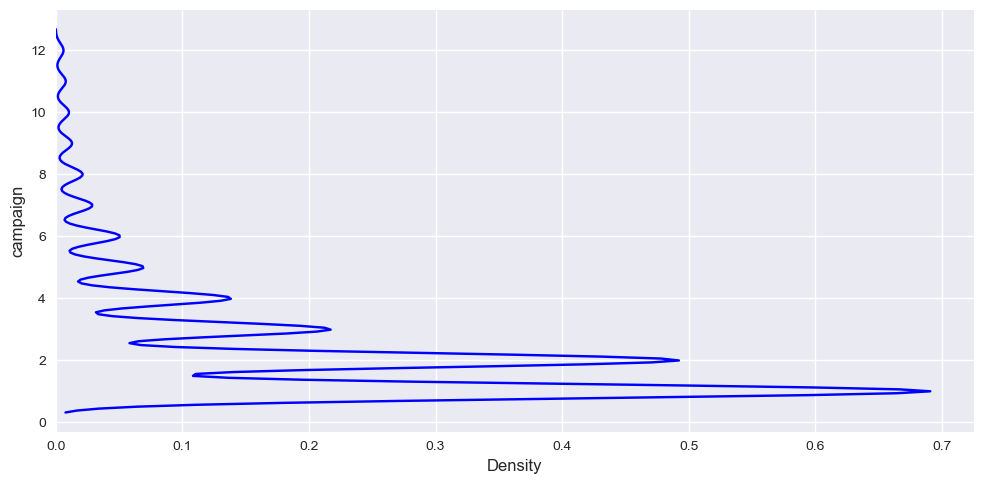

In [ ]:
num = ['campaign']
plt.figure(figsize=(10,5))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.kdeplot(y=df_zscore[num[i]], color='blue')
    plt.tight_layout()

- Melakukan handling outlier dengan Z-score.
- Jumlah data setelah di-handling outlier menjadi 41446.
- meskipun begitu hasil dari z-score dapat dikatakan masih banyak outliers. karena metode zscore hanya membuang 0,3% data yang paling ekstrim. maka perlu pertimbangan untuk memilih metode IQR yang bisa membuang outlier dengan sangat ketat

In [ ]:
df_iqr=df_outliers.copy() #cekpoin

In [ ]:
# menghitung IQR untuk setiap kolom numerikal
iqr_results = {}

for column in num:
    q1 = df_iqr[column].quantile(0.25)
    q3 = df_iqr[column].quantile(0.75)
    iqr = q3 - q1
    iqr_results[column] = iqr

# menampilkan hasil perhitungan IQR
for column, iqr in iqr_results.items():
    print(f"IQR untuk {column}: {iqr}")

IQR untuk campaign: 2.0


In [ ]:
# mendefinisikan batas IQR untuk outlier detection
outlier_threshold = 1.5

# mendefinisikan fungsi  untuk menghapus outlier dari sebuah kolom
def remove_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - outlier_threshold * iqr
    upper_bound = q3 + outlier_threshold * iqr
    return column[(column >= lower_bound) & (column <= upper_bound)]

# menghapus outlier dari setiap kolom

for column in ['campaign']:
    df_iqr[column] = remove_outliers(df_iqr[column])

df_iqr_clear = df_iqr.dropna()
# menyimpan DataFrame yang telah dihapus outlier
#cleaned_file_path = 'nama_file_cleaned.csv'
#df.to_csv(cleaned_file_path, index=False)  # Simpan dalam format CSV
# df.to_excel(cleaned_file_path, index=False)  # Simpan dalam format Excel

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier : {len(df_outliers)}')
print(f'Jumlah baris setelah memfilter outlier : {len(df_iqr_clear)}')

Jumlah baris sebelum memfilter outlier : 45211
Jumlah baris setelah memfilter outlier : 42147


Setelah melakukan handle outliers dengan IQR dapat dilihat data yang terbuang cukup banyak, perlu dipertimbangkan kembali apakah ingin menggunakan IQR atau Zscore ataupun tetap membiarkan outliers


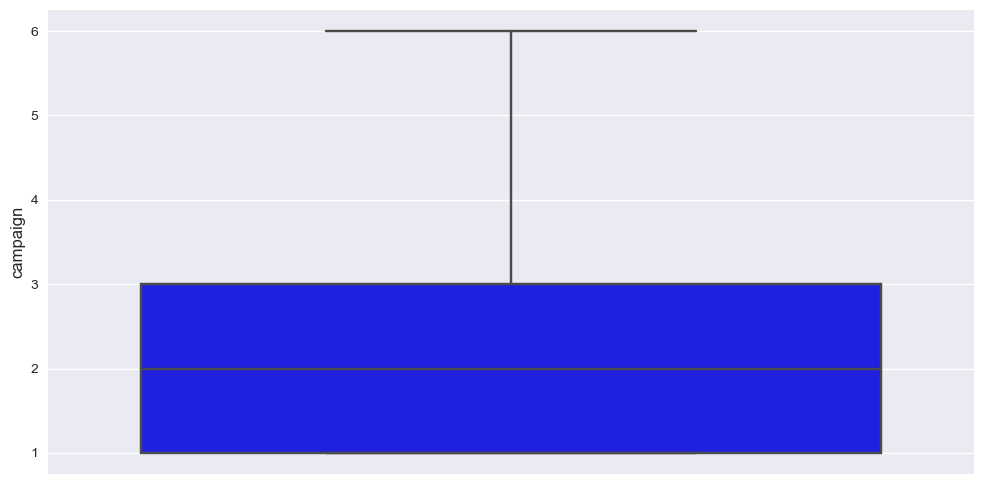

In [ ]:
num = ['campaign']
plt.figure(figsize=(10,5))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df_iqr_clear[num[i]], color='blue')
    plt.tight_layout()

## MODELING

In [ ]:
#Pemisahan data fitur dan target
X = df_iqr_clear.drop(columns=['deposit'],axis = 1)
Y = df_iqr_clear.deposit

#Split data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
X.shape

(42147, 26)

In [ ]:
ytest.shape

(12645,)

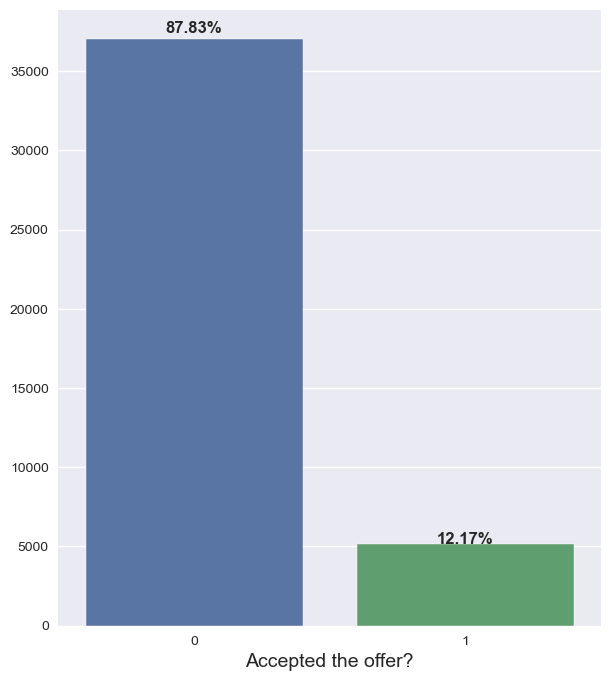

In [ ]:
plt.figure(figsize=(7,8))
ax = sns.countplot(data = df_iqr_clear, x = df_iqr_clear['deposit'])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{round(height * 100 / df_iqr_clear.shape[0], 2)}%', (x + width/2, y + height * 1.01), ha='center', weight = 'bold', fontsize = 12)
plt.xlabel(r'Accepted the offer?', fontsize = 14)
plt.ylabel(r'')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0,n_jobs=-1)
Xtrain_smt, ytrain_smt = smote.fit_resample(Xtrain, ytrain)

print(f"""
Original y shape: {ytrain.shape}
SMOTE y shape: {ytrain_smt.shape}
""")


Original y shape: (29502,)
SMOTE y shape: (51842,)



In [ ]:
print(f"""
Original x shape: {Xtrain.shape}
SMOTE x shape: {Xtrain_smt.shape}
""")


Original x shape: (29502, 26)
SMOTE x shape: (51842, 26)



## Normalisasi Data

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler    = RobustScaler()
train_std = scaler.fit_transform(Xtrain_smt)
test_std  = scaler.fit_transform(Xtest)

X_train_std = pd.DataFrame(train_std, columns=X.columns)
X_test_std  = pd.DataFrame(test_std, columns=X.columns)

X_train_std

,marital,education,default,balance,housing,loan,contact,month,campaign,age_group,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-1.0,0.0,0.0,-0.331457,1.0,0.0,-1.0,0.4,1.337785,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,-0.352095,0.0,0.0,0.0,-1.0,0.027859,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,0.0,0.0,-0.098812,0.0,0.0,0.0,0.4,-0.627103,-1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.0,-1.0,0.0,-0.244528,0.0,0.0,-1.0,0.0,-0.627103,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,-0.278299,0.0,1.0,1.0,-0.2,0.682822,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51837,0.0,0.0,0.0,0.754221,0.0,0.0,-1.0,-0.2,0.369320,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
51838,-1.0,0.0,0.0,-0.352095,1.0,0.0,0.0,-1.2,0.682822,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51839,0.0,0.0,0.0,-0.168230,0.0,0.0,0.0,-0.2,1.546708,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51840,-1.0,0.0,0.0,-0.352095,1.0,0.0,0.0,0.4,-0.090902,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Algoritma Machine Learning
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=42)
clf = AdaBoostClassifier()
xg = XGBClassifier()
lgbm = LGBMClassifier(random_state=42, class_weight='balanced')
knn = KNeighborsClassifier()
nb = GaussianNB()
MLA = [logreg, dt, rf, knn, clf, xg, lgbm, nb]

In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_validate

# Membuat hasil evaluasi model dalam bentuk Data Frame
MLA_columns = ['MLA used', 'Train Accuracy (%)', 'Test Accuracy (%)',
               'Train Precision (%)','Test Precision (%)',
               'Train Recall (%)', 'Test Recall (%)','CV recall (recall train)', 'CV recall (recall test)',
               'Train F1-Score (%)', 'Train F1-Score (%)',
               'roc-auc (test prob)', 'roc-auc (train prob)',
              ]

MLA_compare = pd.DataFrame(columns=MLA_columns)

row_index = 0
for alg in MLA:
    model = alg.fit(X_train_std, ytrain_smt)
    y_pred = alg.predict(X_test_std)
    y_pred_train = alg.predict(X_train_std)
    y_pred_proba = alg.predict_proba(X_test_std)[:, 1]
    y_pred_proba_train = alg.predict_proba(X_train_std)[:, 1]


    score = cross_validate(alg, X_train_std, ytrain_smt, cv=5, scoring = 'recall', return_train_score=True)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy (%)'] = round(accuracy_score(ytrain_smt, y_pred_train) * 100, 3)
    MLA_compare.loc[row_index, 'Test Accuracy (%)'] = round(accuracy_score(ytest, y_pred) * 100, 3)

    MLA_compare.loc[row_index, 'Train Precision (%)'] = round(precision_score(ytrain_smt, y_pred_train) * 100, 3)
    MLA_compare.loc[row_index, 'Test Precision (%)'] = round(precision_score(ytest, y_pred) * 100, 3)

    MLA_compare.loc[row_index, 'Train Recall (%)'] = round(recall_score(ytrain_smt, y_pred_train) * 100, 3)
    MLA_compare.loc[row_index, 'Test Recall (%)'] = round(recall_score(ytest, y_pred) * 100, 3)

    MLA_compare.loc[row_index, 'Train F1-Score (%)'] = round(f1_score(ytrain_smt, y_pred_train) * 100, 3)
    MLA_compare.loc[row_index, 'Test F1-Score (%)'] = round(f1_score(ytest, y_pred) * 100, 3)

    MLA_compare.loc[row_index, 'roc-auc (train prob)'] = round(roc_auc_score(ytrain_smt, y_pred_proba_train), 3)
    MLA_compare.loc[row_index, 'roc-auc (test prob)'] = round(roc_auc_score(ytest, y_pred_proba), 3)

    MLA_compare.loc[row_index, 'CV recall (recall train)'] = round(score['train_score'].mean(), 3)
    MLA_compare.loc[row_index, 'CV recall (recall test)'] = round(score['test_score'].mean(), 3)

    row_index += 1

[LightGBM] [Info] Number of positive: 25921, number of negative: 25921
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 573
[LightGBM] [Info] Number of data points in the train set: 51842, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 20737, number of negative: 20736
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 573
[LightGBM] [Info] Number of data points in the train set: 41473, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore

In [ ]:
MLA_compare #after smote

,MLA used,Train Accuracy (%),Test Accuracy (%),Train Precision (%),Test Precision (%),Train Recall (%),Test Recall (%),CV recall (recall train),CV recall (recall test),Train F1-Score (%),Train F1-Score (%),roc-auc (test prob),roc-auc (train prob),Test F1-Score (%)
0,LogisticRegression,89.852,82.357,98.312,32.389,81.096,40.659,0.812,0.802,88.878,88.878,0.708,0.943,36.056
1,DecisionTreeClassifier,99.649,44.864,99.78,14.078,99.518,68.714,0.995,0.876,99.648,99.648,0.552,1.0,23.368
2,RandomForestClassifier,99.649,59.763,99.722,17.897,99.576,63.801,0.996,0.876,99.649,99.649,0.67,1.0,27.952
3,KNeighborsClassifier,92.062,74.314,92.922,22.323,91.061,44.344,0.911,0.881,91.982,91.982,0.65,0.979,29.697
4,AdaBoostClassifier,90.176,33.61,94.478,13.92,85.34,85.391,0.86,0.838,89.677,89.677,0.653,0.946,23.938
5,XGBClassifier,94.03,19.668,98.25,12.906,89.657,96.833,0.902,0.855,93.757,93.757,0.702,0.981,22.776
6,LGBMClassifier,92.896,21.416,97.807,13.137,87.759,96.639,0.884,0.85,92.511,92.511,0.701,0.972,23.130
7,GaussianNB,77.41,57.098,72.646,15.375,87.929,55.656,0.877,0.869,79.56,79.56,0.602,0.887,24.094


Dari hasil evaluasi metrik yang terlihat pada data frame diatas nilai yang paling best fit adalah model yang menggunakan AdaBoost, dengan recall score 86,6% pada train dan 85% pada test. sehingga model tersebut yang akan kami gunakan untuk proses produksi

In [ ]:
# melihat future importance

def eval_classification(model):
    y_pred = model.predict(X_test_std)
    y_pred_train = model.predict(X_train_std)
    y_pred_proba = model.predict_proba(X_test_std)
    y_pred_proba_train = model.predict_proba(X_train_std)

    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(ytrain_smt, y_pred_train))

    print("Precision (Test Set): %.2f" % precision_score(ytest, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(ytrain_smt, y_pred_train))

    print("Recall (Test Set): %.2f" % recall_score(ytest, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(ytrain_smt, y_pred_train))


    print("F1-Score (Test Set): %.2f" % f1_score(ytest, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(ytrain_smt, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(ytrain_smt, y_pred_proba_train[:, 1]))
    #
    score = cross_validate(model, X_train_std, ytrain_smt, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [ ]:
clf_rs = clf.fit(X_train_std, ytrain_smt) # fit model
eval_classification(clf)

Accuracy (Test Set): 0.34
Accuracy (Train Set): 0.90
Precision (Test Set): 0.14
Precision (Train Set): 0.94
Recall (Test Set): 0.85
Recall (Train Set): 0.85
F1-Score (Test Set): 0.24
F1-Score (Train Set): 0.90
roc_auc (test-proba): 0.65
roc_auc (train-proba): 0.95
recall (crossval train): 0.8598817031806927
recall (crossval test): 0.8380035001250045


#### HYPER PARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10,50,100,500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', ' SAMME.R']

grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=5, scoring='recall')

grid_result = grid_search.fit(X_train_std, ytrain_smt)

print("Best : %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best : 0.877935 using {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 500}


In [ ]:
eval_classification(grid_search)

Accuracy (Test Set): 0.32
Accuracy (Train Set): 0.75
Precision (Test Set): 0.14
Precision (Train Set): 0.70
Recall (Test Set): 0.88
Recall (Train Set): 0.88
F1-Score (Test Set): 0.24
F1-Score (Train Set): 0.78
roc_auc (test-proba): 0.66
roc_auc (train-proba): 0.85
recall (crossval train): 0.882469687520279
recall (crossval test): 0.807140738657333


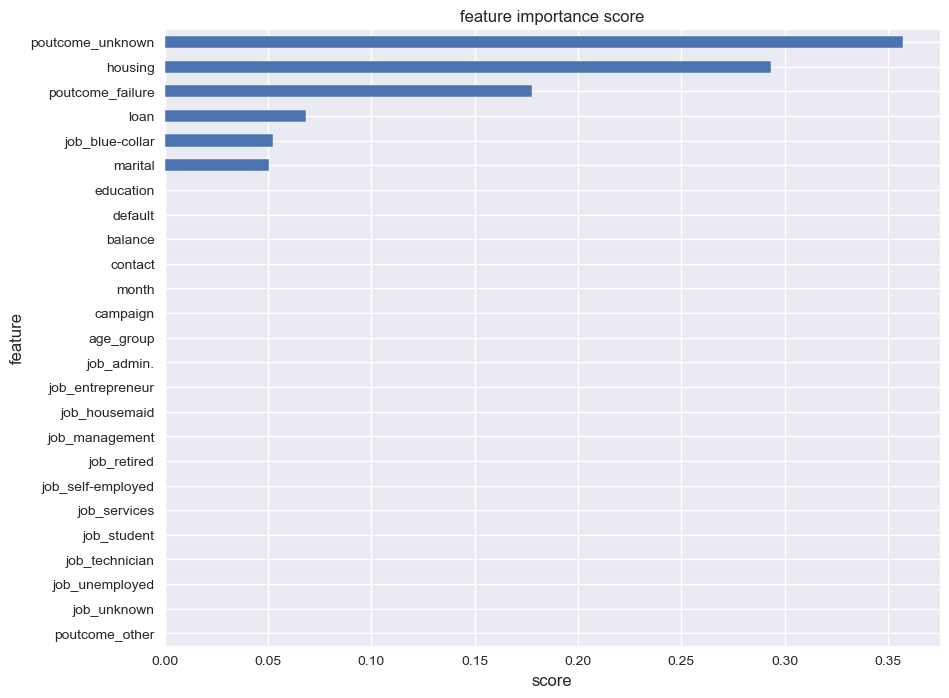

In [ ]:
show_feature_importance(grid_result.best_estimator_)

pada bagian future importance terlihat kolo campaign merupakan fitur yang paling penting, definisi campaign sendiri adalah jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini

In [ ]:
from sklearn import metrics

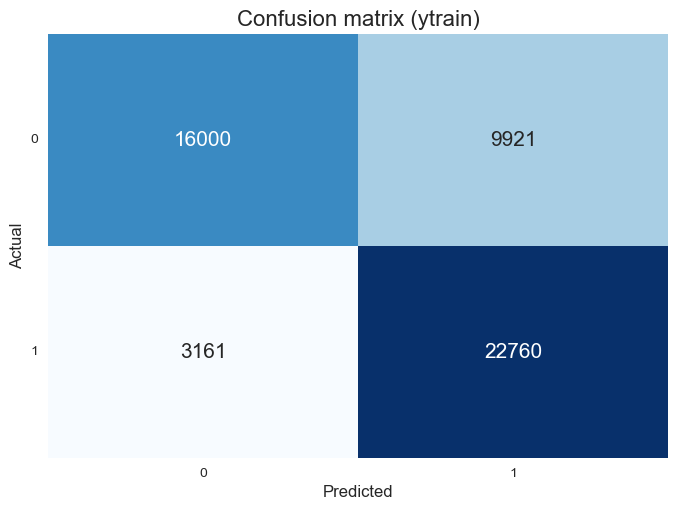

In [ ]:
y_pred_train = grid_search.predict(X_train_std)
confusion_matrix_test = metrics.confusion_matrix(ytrain_smt, y_pred_train)
sns.heatmap(
    confusion_matrix_test,
    annot=True,
    fmt="g",
    cmap="Blues",
    cbar=False,
    annot_kws={"size": 15},
)
plt.title("Confusion matrix (ytrain)", fontsize=16)
plt.yticks(rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

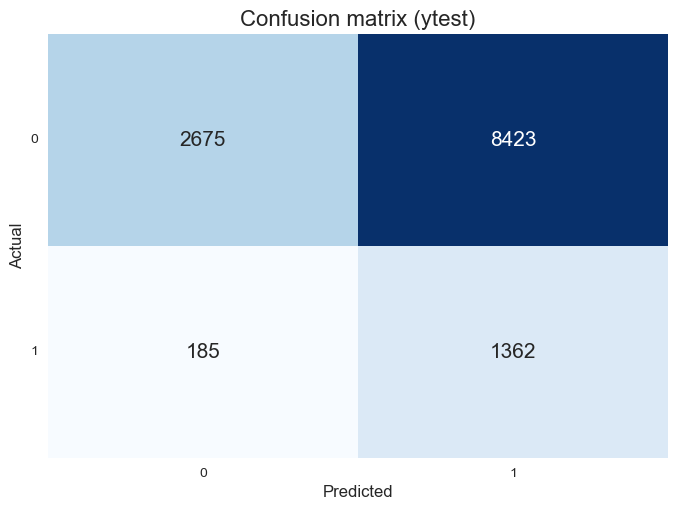

In [ ]:
y_pred_test = grid_search.predict(X_test_std)
confusion_matrix_test = metrics.confusion_matrix(ytest, y_pred_test)
sns.heatmap(
    confusion_matrix_test,
    annot=True,
    fmt="g",
    cmap="Blues",
    cbar=False,
    annot_kws={"size": 15},
)
plt.title("Confusion matrix (ytest)", fontsize=16)
plt.yticks(rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()